<a href="https://colab.research.google.com/github/ConnorM1205/My-Website-css-js-html/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
data = load_iris()

In [21]:
X = data.data
y = data.target

In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [28]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

In [29]:
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.9


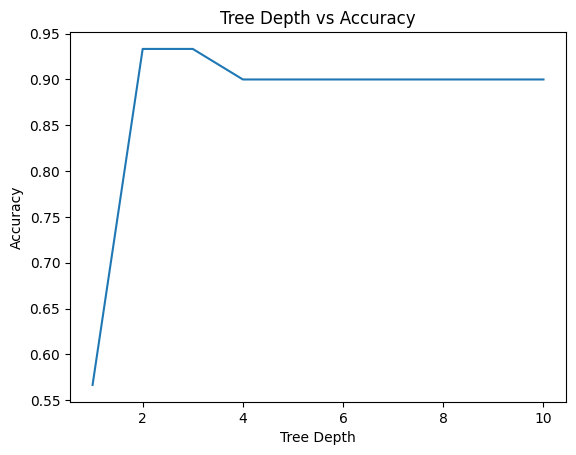

In [30]:
y_preds = []
for i in range(1,11):
    clf = DecisionTreeClassifier(criterion="gini", max_depth=i )
    clf.fit(X_train, y_train)
    y_preds.append(metrics.accuracy_score(y_val, clf.predict(X_val)))

xpoints = np.array([1,2,3,4,5,6,7,8,9,10])
ypoints = np.array(y_preds)


plt.plot(xpoints, ypoints)
plt.title("Tree Depth vs Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()


In [32]:
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9333333333333333


In [27]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9222222222222222
DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
